In [1]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import matplotlib.mlab as mlab
import matplotlib
from matplotlib import style
plt.style.use('Solarize_Light2')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,8)

pd.options.mode.chained_assignment = None


In [2]:
###Import af data

dfklip = pd.read_csv('uge31klippelog.csv')

dfpogo = pd.read_csv('uge31pogo.csv')

dfstimp = pd.read_csv('uge31stimp.csv')

print("Clipdata:")
print (dfklip.describe())

print("\nPogo:")
print (dfpogo.describe())

print("\nStimp:")
print(dfstimp.describe())

Clipdata:
               Hul
count  4340.000000
mean     10.500000
std       5.766946
min       1.000000
25%       5.750000
50%      10.500000
75%      15.250000
max      20.000000

Pogo:
       Dataset  Moisture (Avg) (%)  Moisture (Min) (%)  Moisture (Max) (%)
count     94.0           94.000000           94.000000           94.000000
mean       1.0           23.690426           15.574468           33.319149
std        0.0            3.192972            3.545372            4.240645
min        1.0           13.900000            8.000000           20.000000
25%        1.0           21.900000           13.000000           30.000000
50%        1.0           23.700000           15.000000           34.000000
75%        1.0           26.150000           19.000000           36.000000
max        1.0           30.500000           25.000000           41.000000

Stimp:
         Stimp CM  Bobble  Chatter  Snaking  Trueness
count  194.000000     0.0      0.0      0.0       0.0
mean   320.329897    

In [3]:
dfklip.head()

,Dato,Retning,Hul,Liter,Maskine,Højde,Bemærkning,Person,Cleanup,Brush,Rulle,Led,Unnamed: 12
0,16/04/2023,NaN,1,4,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
1,16/04/2023,NaN,2,6,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
2,16/04/2023,NaN,3,5,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
3,16/04/2023,NaN,4,8,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
4,16/04/2023,NaN,5,4,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN


In [4]:
###Datacleaning - Drop values + cols 

dfklip = dfklip.dropna(subset=['Dato'])

dfklip = dfklip.loc[:, ~dfklip.columns.str.startswith('Unnamed')]

dfstimp = dfstimp[dfstimp.columns[:dfstimp.columns.get_loc('Stimp F') + 1]]
dfstimp = dfstimp.dropna(subset=['Dato'])

print(dfklip.head())
print(dfstimp.head())

         Dato Retning  Hul Liter Maskine Højde Bemærkning Person Cleanup  \
0  16/04/2023     NaN    1     4     NaN   NaN        NaN    NaN      No   
1  16/04/2023     NaN    2     6     NaN   NaN        NaN    NaN      No   
2  16/04/2023     NaN    3     5     NaN   NaN        NaN    NaN      No   
3  16/04/2023     NaN    4     8     NaN   NaN        NaN    NaN      No   
4  16/04/2023     NaN    5     4     NaN   NaN        NaN    NaN      No   

  Brush Rulle  Led  
0   NaN   NaN  NaN  
1   NaN   NaN  NaN  
2   NaN   NaN  NaN  
3   NaN   NaN  NaN  
4   NaN   NaN  NaN  
         Dato     Hul  Stimp CM Stimp F
0  10/05/2023  Hul 15     249.0     8,2
1  10/05/2023  Hul 15     246.0     8,1
2  10/05/2023  Hul 15     248.0     8,1
3  10/05/2023  Hul 15     273.0     9,0
4  10/05/2023  Hul 15     280.0     9,2


In [5]:
### Datacleaning værdiger
dfklip['Liter'] = dfklip['Liter'].astype(str).str.replace(',','.')

dfstimp = dfstimp.rename(columns={'Stimp F': 'Stimp_F'})
dfstimp = dfstimp.rename(columns={'Stimp CM': 'Stimp_CM'})
dfstimp['Stimp_F'] = dfstimp['Stimp_F'].astype(str).str.replace(',','.').astype(float)

dfpogo[['Dato','Time']] = dfpogo['Sample Date'].str.split(' ', n=1,expand=True)
dfpogo = dfpogo.drop(columns=['Sample Date'])


In [6]:
def categorize_stimp(stimp):
    if pd.isna(stimp):
        return None
    elif stimp < 9:
        return 'Low'
    elif 10 <= stimp <= 10.5:
        return 'Target range'
    else:
        return 'High'
    
dfstimp['Stimp_range'] = dfstimp['Stimp_F'].apply(categorize_stimp)


In [7]:
###Datacleaning Dato til pd.datetime
from datetime import datetime, timedelta

dfklip['Dato'] = pd.to_datetime(dfklip['Dato'], format='%d/%m/%Y', dayfirst=True)
dfstimp['Dato'] = pd.to_datetime(dfstimp['Dato'], format='%d/%m/%Y', dayfirst=True)
dfpogo['Dato'] = pd.to_datetime(dfpogo['Dato'], format='%Y-%m-%d')

dfklip['Week'] = dfklip['Dato'].dt.isocalendar().week
dfstimp['Week'] = dfstimp['Dato'].dt.isocalendar().week
dfpogo['Week'] = dfpogo['Dato'].dt.isocalendar().week

dfklip['Year'] = dfklip['Dato'].dt.year
dfstimp['Year'] = dfstimp['Dato'].dt.year
dfpogo['Year']  = dfpogo['Dato'].dt.year

print("Cleaned dfklip:")
print(dfklip.head())
print("\nCleaned dfstimp:")
print(dfstimp.head())
print("\nCleaned dfpogo:")
print(dfpogo.head())

Cleaned dfklip:
        Dato Retning  Hul Liter Maskine Højde Bemærkning Person Cleanup Brush  \
0 2023-04-16     NaN    1     4     NaN   NaN        NaN    NaN      No   NaN   
1 2023-04-16     NaN    2     6     NaN   NaN        NaN    NaN      No   NaN   
2 2023-04-16     NaN    3     5     NaN   NaN        NaN    NaN      No   NaN   
3 2023-04-16     NaN    4     8     NaN   NaN        NaN    NaN      No   NaN   
4 2023-04-16     NaN    5     4     NaN   NaN        NaN    NaN      No   NaN   

  Rulle  Led  Week  Year  
0   NaN  NaN    15  2023  
1   NaN  NaN    15  2023  
2   NaN  NaN    15  2023  
3   NaN  NaN    15  2023  
4   NaN  NaN    15  2023  

Cleaned dfstimp:
        Dato     Hul  Stimp_CM  Stimp_F Stimp_range  Week  Year
0 2023-05-10  Hul 15     249.0      8.2         Low    19  2023
1 2023-05-10  Hul 15     246.0      8.1         Low    19  2023
2 2023-05-10  Hul 15     248.0      8.1         Low    19  2023
3 2023-05-10  Hul 15     273.0      9.0        High    19  20

<function matplotlib.pyplot.show(close=None, block=None)>

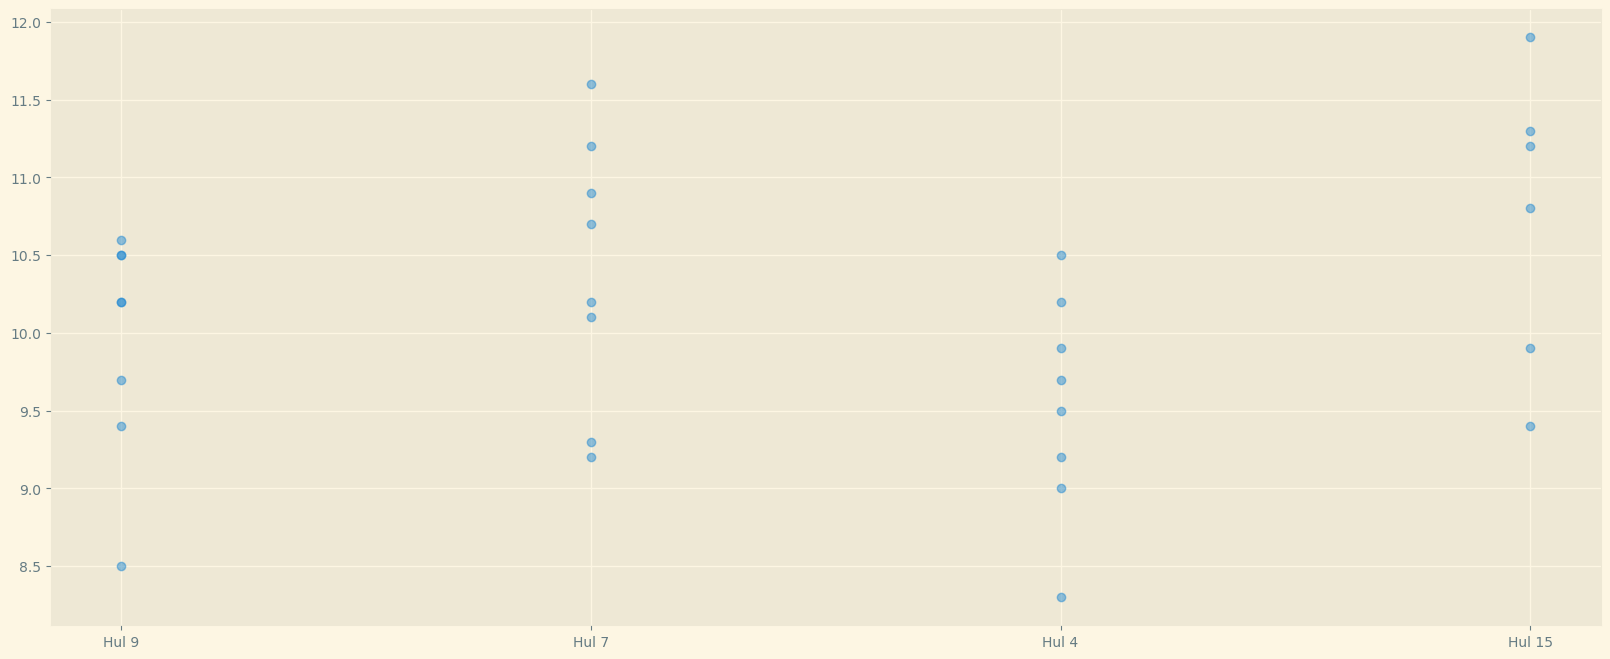

In [8]:
uge_29_stimp = dfstimp[dfstimp['Week'] == 29]

plt.figure(figsize=(20,8))
plt.scatter(uge_29_stimp['Hul'],uge_29_stimp['Stimp_F'],alpha=0.5)
plt.show



Average ml/m2 per Green:
    Hul  ml_per_m2
0     1  17.366062
1     2  16.597510
2     3  16.411998
3     4  20.084830
4     5  16.778523
5     6  18.266667
6     7  17.236467
7     8  18.058691
8     9  16.140351
9    10  20.274914
10   11  17.254902
11   12  19.503546
12   13  18.575324
13   14  18.654434
14   15  15.911172
15   16  21.146617
16   17  20.998677
17   18  16.588603
18   19  10.063320
19   20   8.515815


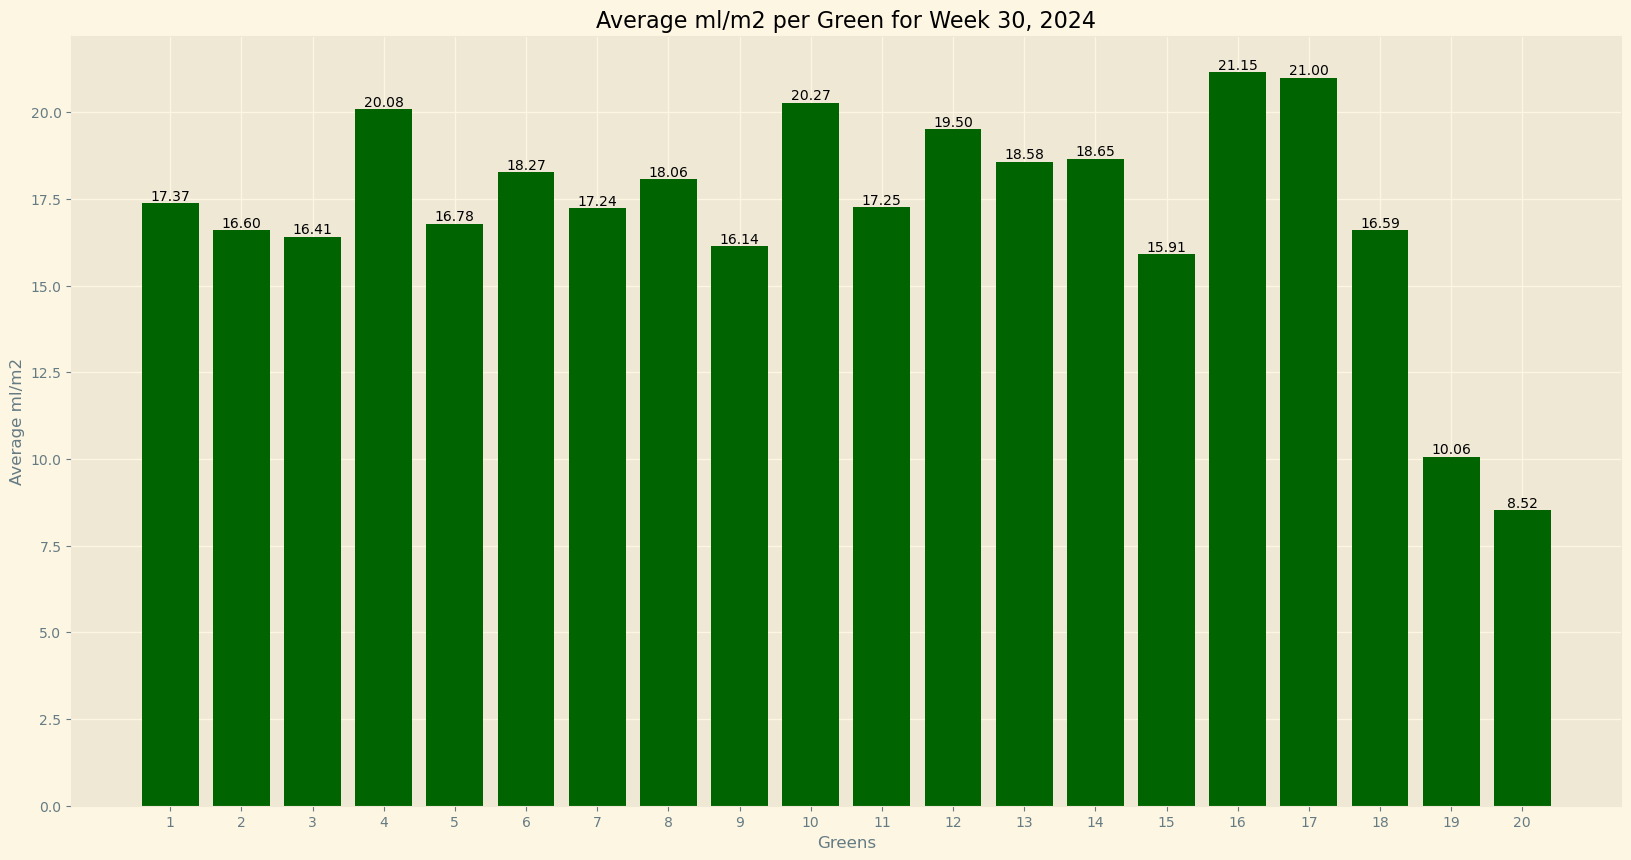

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Green sizes dictionary
green_sizes = {
    '1': 455.87, '2': 482, '3': 589, '4': 668, '5': 447, '6': 625, '7': 585, '8': 443, '9': 475, '10': 485,
    '11': 425, '12': 658, '13': 489, '14': 545, '15': 728, '16': 532, '17': 504, '18': 427, '19': 737, '20': 274
}

###ÆNDRE HER FOR ANDEN UGE 
mlm2_uge = dfklip[(dfklip['Week'] == 30) & (dfklip['Year'] == 2024)]

# Ensure 'Hul' is string for matching green sizes
mlm2_uge['Hul'] = mlm2_uge['Hul'].astype(str)

# Calculate ml/m²
mlm2_uge['Green Size'] = mlm2_uge['Hul'].map(green_sizes)
mlm2_uge['Liter'] = mlm2_uge['Liter'].astype(str).str.replace(',', '.').astype(float)
mlm2_uge['ml_per_m2'] = (mlm2_uge['Liter'] * 1000) / mlm2_uge['Green Size']

# Group by 'Hul' to calculate the average ml_per_m2 per green
average_ml_per_m2 = mlm2_uge.groupby('Hul')['ml_per_m2'].mean().reset_index()

# Ensure all 'Hul' values from 1 to 20 are included
all_huls = pd.DataFrame({'Hul': [str(i) for i in range(1, 21)]})
average_ml_per_m2 = all_huls.merge(average_ml_per_m2, on='Hul', how='left').fillna(0)

# Convert 'Hul' back to integers for sorting and plotting
average_ml_per_m2['Hul'] = average_ml_per_m2['Hul'].astype(int)
average_ml_per_m2 = average_ml_per_m2.sort_values('Hul')

# Print the result
print("Average ml/m2 per Green:")
print(average_ml_per_m2)

# Plot the result as a bar plot with darker green bars and labels
plt.figure(figsize=(20, 10))
bars = plt.bar(average_ml_per_m2['Hul'], average_ml_per_m2['ml_per_m2'], color='darkgreen')
plt.xlabel('Greens')
plt.ylabel('Average ml/m2')
plt.title('Average ml/m2 per Green for Week 30, 2024')
plt.xticks(ticks=average_ml_per_m2['Hul'], labels=average_ml_per_m2['Hul'])

# Add labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

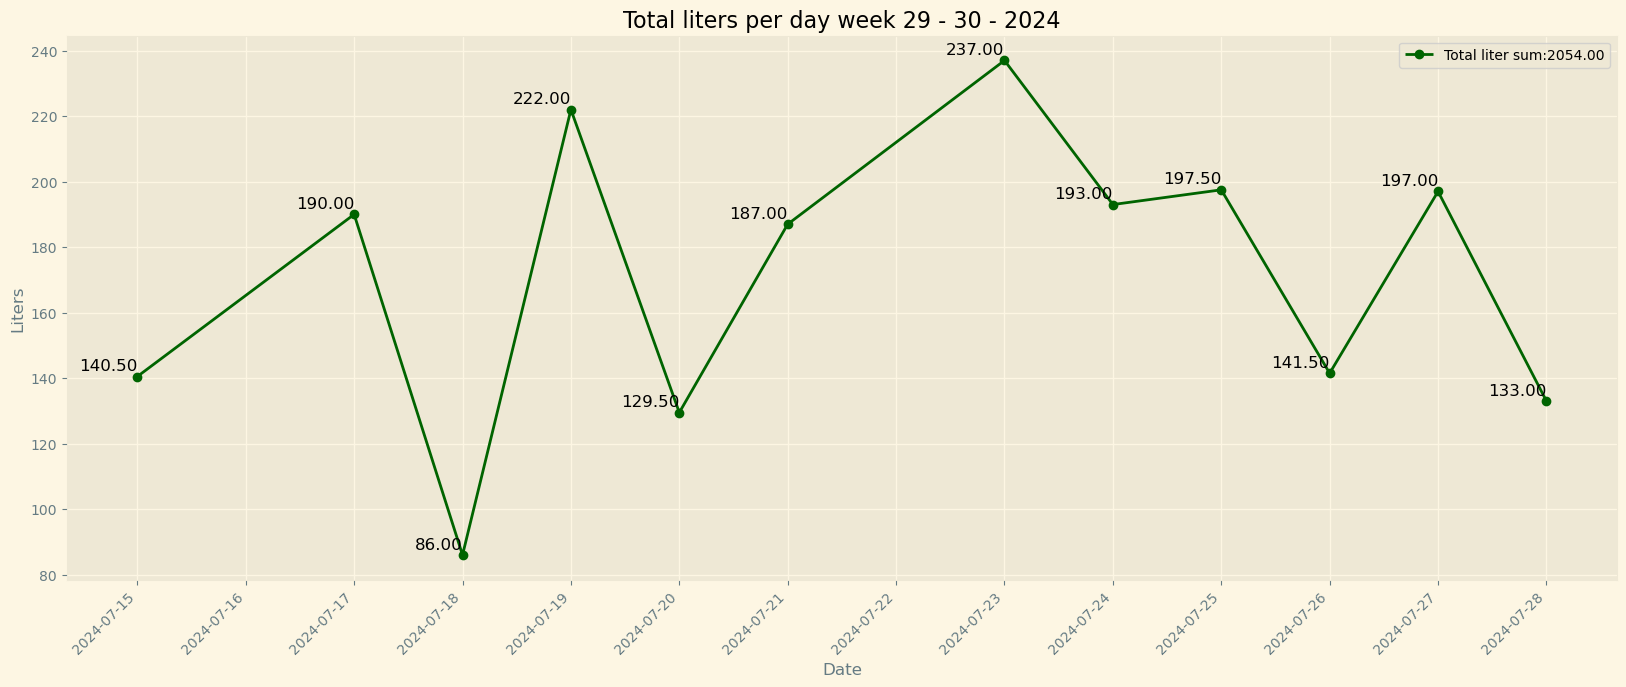

In [10]:
import matplotlib.dates as mdates
# Filter the data for the specific week and year
weeks = [29,30]
line_uge = dfklip[(dfklip['Week'].isin(weeks)) & (dfklip['Year'] == 2024)]

line_uge['Hul'] = line_uge['Hul'].astype(str)
line_uge['Liter'] = line_uge['Liter'].astype(str).str.replace(',', '.').astype(float)




# Group the data by 'dato' and sum the 'Liter' column
line_liter = line_uge.groupby('Dato')['Liter'].sum()
total_week_liters =line_liter.sum()
# Plot the line graph
plt.figure(figsize=(20, 8))
line_liter.plot(kind='line', marker='o',color='darkgreen')
plt.title('Total liters per day week 29 - 30 - 2024')
plt.xlabel('Date')
plt.ylabel('Liters')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to display full dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())


# Annotate each data point with its value
for x, y in zip(line_liter.index, line_liter.values):
    plt.text(x, y + 0.9, f'{y:.2f}', ha='right', va='bottom', fontsize=12)

plt.legend([f'Total liter sum:{total_week_liters:.2f}'], loc='upper right')

plt.show()



      Hul  Stimp_F
0  Hul 15   11.075
1   Hul 4    9.875
2   Hul 7   10.525
3   Hul 9   10.075

Stimp_avg_Uge 10.3875


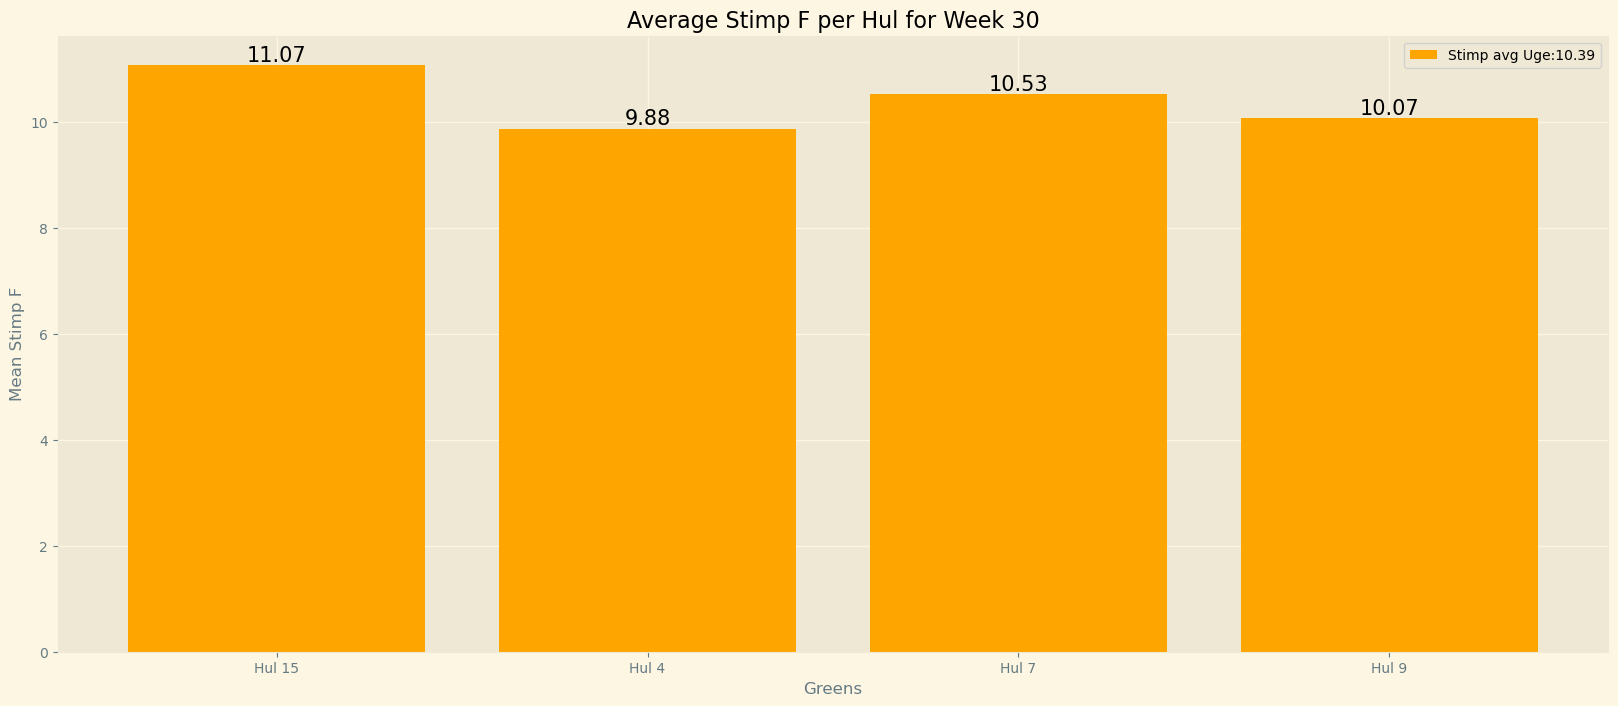

In [11]:
###ÆNDRE HER FOR ANDEN UGE 
stimp_uge = dfstimp[(dfstimp['Week'] == 30) & (dfstimp['Year'] == 2024)]



mean_stimp = stimp_uge.groupby('Hul')['Stimp_F'].mean().reset_index()
stimp_avg_Uge = stimp_uge['Stimp_F'].mean()

# Print the result to ensure it is correct
print(mean_stimp)
print("\nStimp_avg_Uge",stimp_avg_Uge)
# Plot the bar chart
plt.figure(figsize=(20, 8))
bars = plt.bar(mean_stimp['Hul'], mean_stimp['Stimp_F'], color='orange')
plt.xlabel('Greens')
plt.ylabel('Mean Stimp F')
plt.title('Average Stimp F per Hul for Week 30')
plt.xticks(mean_stimp['Hul'])

# Add labels on top of the bars
for index, row in mean_stimp.iterrows():
    plt.text(row['Hul'], row['Stimp_F'], f'{row["Stimp_F"]:.2f}', ha='center', va='bottom', fontsize=15)

plt.legend([f'Stimp avg Uge:{stimp_avg_Uge:.2f}'], loc='upper right')

plt.show()

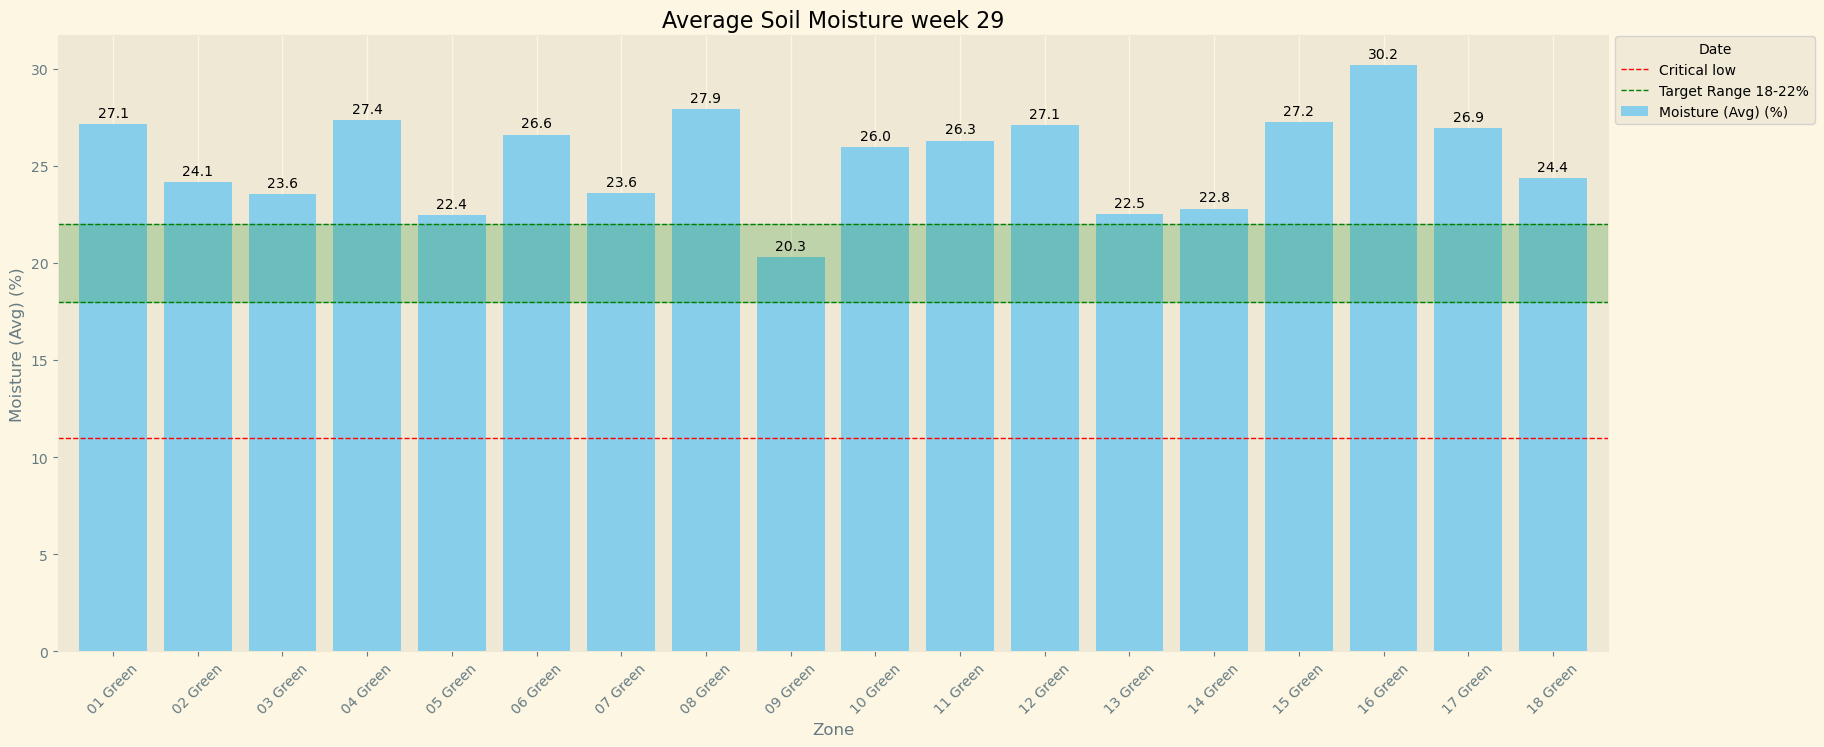

In [12]:
moistweek = dfpogo[(dfpogo['Week'] == 30) & (dfpogo['Year'] == 2024)]

# Group by 'Zone' and 'Date' to calculate mean soil moisture
grouped_df = moistweek.groupby(['Zone'])['Moisture (Avg) (%)'].mean()

# Plotting
ax = grouped_df.plot(kind='bar', figsize=(20, 8), width=0.8, color=['skyblue'])
plt.title('Average Soil Moisture week 29')
plt.xlabel('Zone')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points')

# Adding a red dotted line at 11%
plt.axhline(y=11, color='red', linestyle='--', linewidth=1, label='Critical low')

# Adding green dotted lines at 18% and 22%
plt.axhline(y=18, color='green', linestyle='--', linewidth=1, label='Target Range 18-22%')
plt.axhline(y=22, color='green', linestyle='--', linewidth=1 )

# Shading the area between 18% and 22% with light green
plt.fill_between(ax.get_xlim(), 18, 22, color='green', alpha=0.2)

# Adding legend with the red and green dotted lines
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, title='Date', loc='upper left', bbox_to_anchor=(1, 1.01))

# Display the plot
plt.show()

Average ml/m2 per Green:
    Hul         30         31
0     1  17.366062  18.828467
1     2  16.597510  17.980636
2     3  16.411998  17.968308
3     4  20.084830  20.708583
4     5  16.778523  17.897092
5     6  18.266667  21.466667
6     7  17.236467  20.370370
7     8  18.058691  19.187359
8     9  16.140351  19.122807
9    10  20.274914  20.790378
10   11  17.254902  18.627451
11   12  19.503546  20.896657
12   13  18.575324  19.427403
13   14  18.654434  19.571865
14   15  15.911172  16.597985
15   16  21.146617  22.243108
16   17  20.998677  21.660053
17   18  16.588603  16.783763
18   19  10.063320  10.402533
19   20   8.515815  12.165450


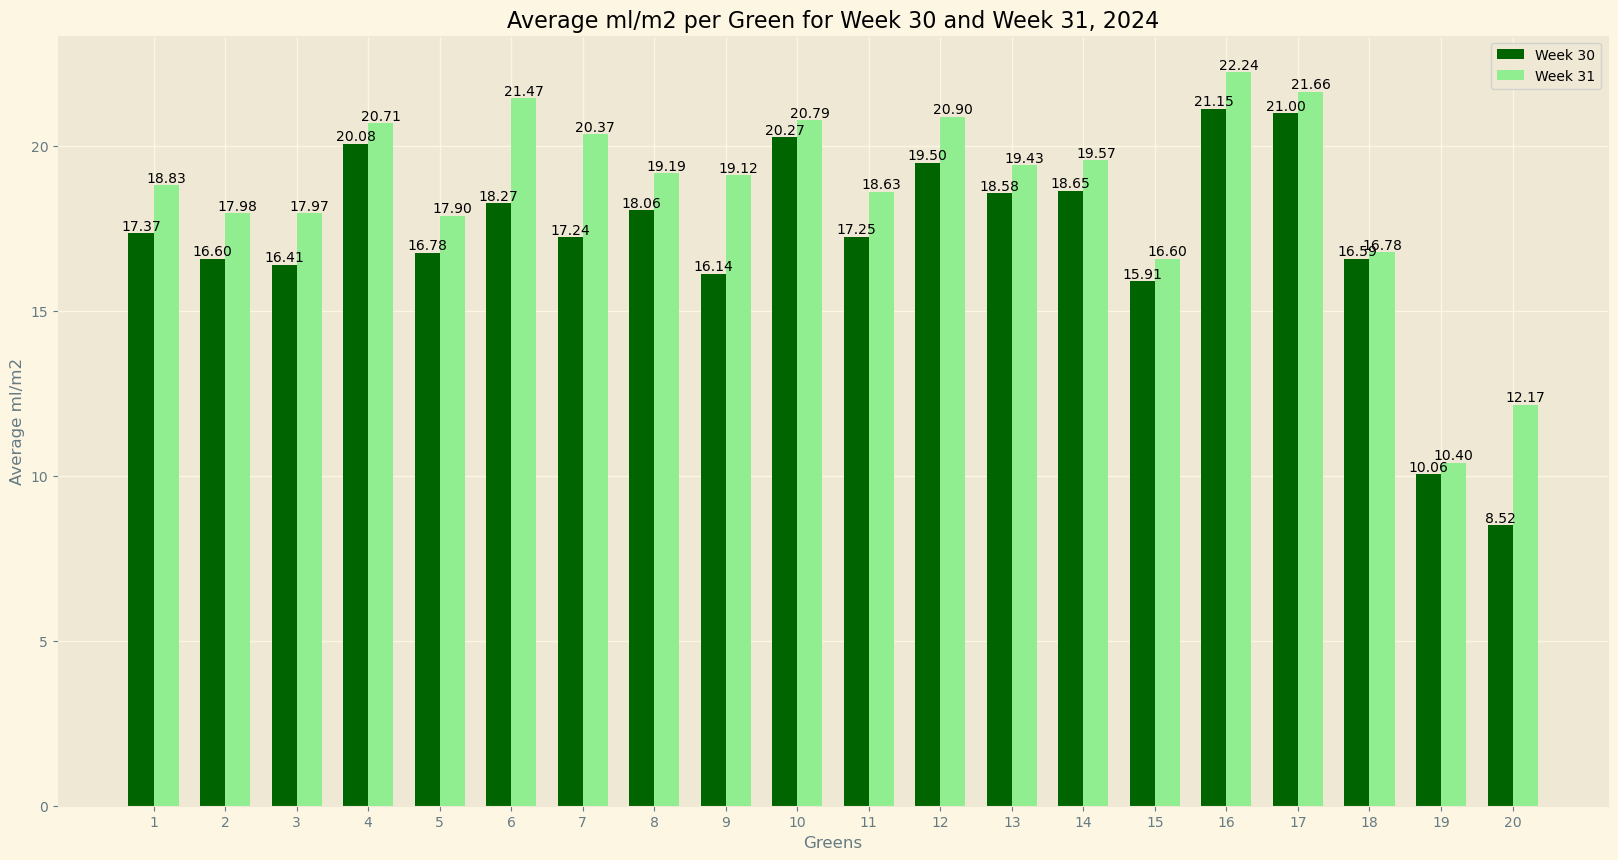

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Green sizes dictionary
green_sizes = {
    '1': 455.87, '2': 482, '3': 589, '4': 668, '5': 447, '6': 625, '7': 585, '8': 443, '9': 475, '10': 485,
    '11': 425, '12': 658, '13': 489, '14': 545, '15': 728, '16': 532, '17': 504, '18': 427, '19': 737, '20': 274
}

# Filter data for weeks 29 and 30
weeks = [30, 31]
mlm2_weeks = dfklip[(dfklip['Week'].isin(weeks)) & (dfklip['Year'] == 2024)]

# Ensure 'Hul' is string for matching green sizes
mlm2_weeks['Hul'] = mlm2_weeks['Hul'].astype(str)

# Calculate ml/m²
mlm2_weeks['Green Size'] = mlm2_weeks['Hul'].map(green_sizes)
mlm2_weeks['Liter'] = mlm2_weeks['Liter'].astype(str).str.replace(',', '.').astype(float)
mlm2_weeks['ml_per_m2'] = (mlm2_weeks['Liter'] * 1000) / mlm2_weeks['Green Size']

# Group by 'Hul' and 'Week' to calculate the average ml_per_m2 per green per week
average_ml_per_m2 = mlm2_weeks.groupby(['Hul', 'Week'])['ml_per_m2'].mean().reset_index()

# Ensure all 'Hul' values from 1 to 20 are included for each week
all_huls = pd.DataFrame({'Hul': [str(i) for i in range(1, 21)]})
average_ml_per_m2 = average_ml_per_m2.pivot(index='Hul', columns='Week', values='ml_per_m2').reset_index()
average_ml_per_m2 = all_huls.merge(average_ml_per_m2, on='Hul', how='left').fillna(0)

# Convert 'Hul' back to integers for sorting and plotting
average_ml_per_m2['Hul'] = average_ml_per_m2['Hul'].astype(int)
average_ml_per_m2 = average_ml_per_m2.sort_values('Hul')

# Print the result
print("Average ml/m2 per Green:")
print(average_ml_per_m2)

# Plot the result as a bar plot with two bars per 'Hul' for each week
fig, ax = plt.subplots(figsize=(20, 10))
bar_width = 0.35
index = average_ml_per_m2['Hul']

bar1 = ax.bar(index - bar_width/2, average_ml_per_m2[30], bar_width, label='Week 30', color='darkgreen')
bar2 = ax.bar(index + bar_width/2, average_ml_per_m2[31], bar_width, label='Week 31', color='lightgreen')

ax.set_xlabel('Greens')
ax.set_ylabel('Average ml/m2')
ax.set_title('Average ml/m2 per Green for Week 30 and Week 31, 2024')
ax.set_xticks(index)
ax.set_xticklabels(average_ml_per_m2['Hul'])
ax.legend()

# Add labels on top of the bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()


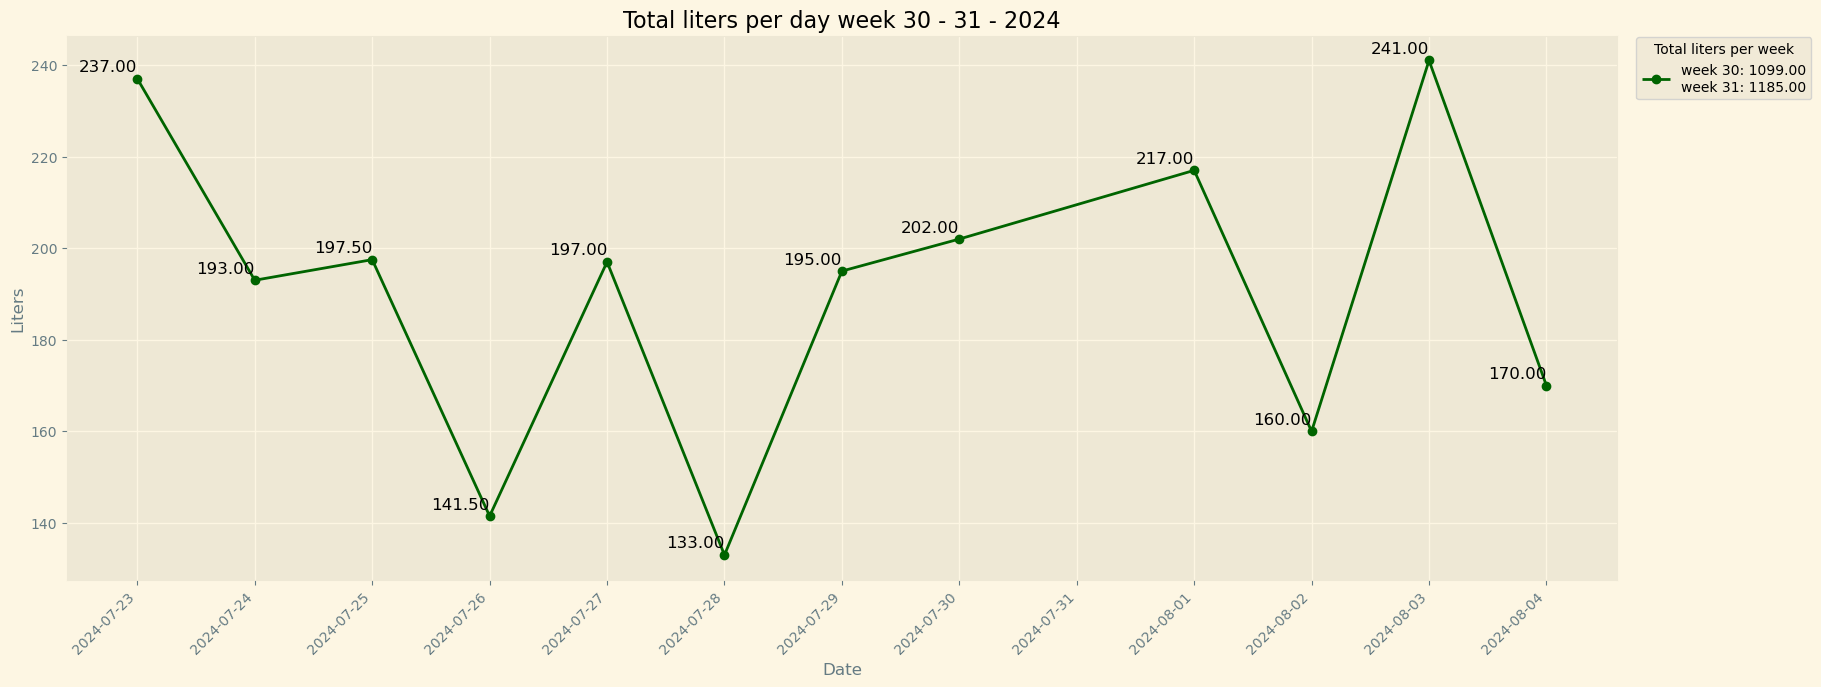

In [18]:
weeks = [30, 31]
line_uge = dfklip[(dfklip['Week'].isin(weeks)) & (dfklip['Year'] == 2024)]

line_uge['Hul'] = line_uge['Hul'].astype(str)
line_uge['Liter'] = line_uge['Liter'].astype(str).str.replace(',', '.').astype(float)

# Group the data by 'Dato' and sum the 'Liter' column
line_liter = line_uge.groupby('Dato')['Liter'].sum()

# Calculate total liters for each week separately
total_week_30_liters = line_uge[line_uge['Week'] == 30]['Liter'].sum()
total_week_31_liters = line_uge[line_uge['Week'] == 31]['Liter'].sum()

# Plot the line graph
plt.figure(figsize=(20, 8))
line_liter.plot(kind='line', marker='o', color='darkgreen')
plt.title('Total liters per day week 30 - 31 - 2024')
plt.xlabel('Date')
plt.ylabel('Liters')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to display full dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())

# Annotate each data point with its value
for x, y in zip(line_liter.index, line_liter.values):
    plt.text(x, y + 0.9, f'{y:.2f}', ha='right', va='bottom', fontsize=12)

# Update the legend to show totals for week 29 and week 30
plt.legend([f'week 30: {total_week_30_liters:.2f}\nweek 31: {total_week_31_liters:.2f}'], loc='upper right',title='Total liters per week',bbox_to_anchor=(1.13, 1.01))

plt.show()

Week  Hul      30         31
0       4   9.875   9.583333
1       7  10.525  10.366667
2       9  10.075  10.687500
3      13   0.000  10.125000
4      15  11.075  11.583333
5      17   0.000  11.183333

Stimp_avg_29 10.3875
Stimp_avg_30 10.619444444444445


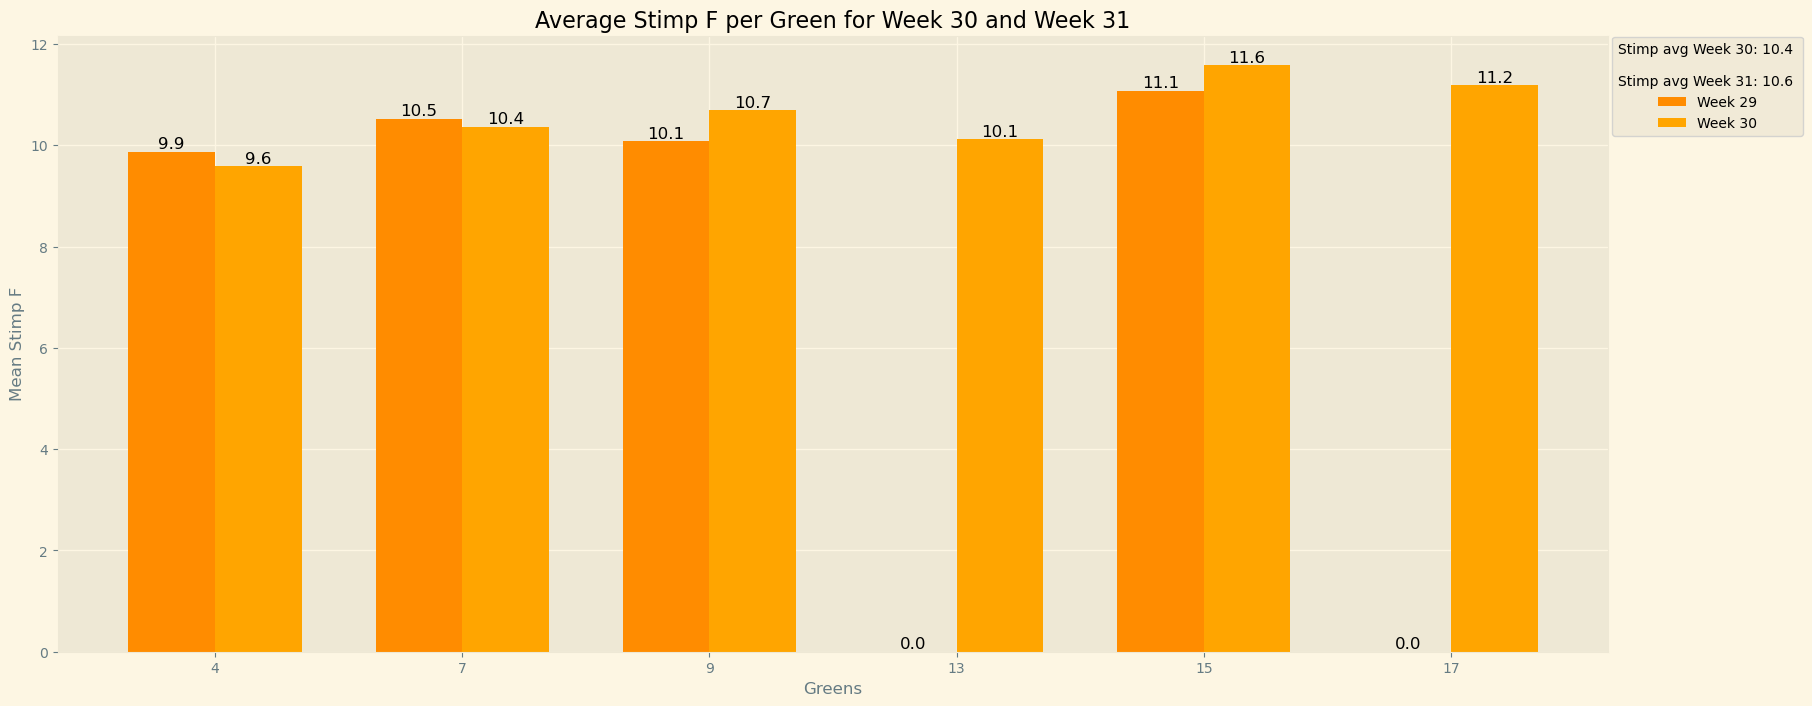

In [19]:
dfstimp['Hul'] = dfstimp['Hul'].astype(str)

# Remove non-numeric parts from 'Hul'
dfstimp['Hul'] = dfstimp['Hul'].str.extract('(\d+)').astype(int)

weeks = [30, 31]
stimp_uge = dfstimp[(dfstimp['Week'].isin(weeks)) & (dfstimp['Year'] == 2024)]

# Group by 'Hul' and 'Week' to calculate the mean Stimp F per green per week
mean_stimp = stimp_uge.groupby(['Hul', 'Week'])['Stimp_F'].mean().reset_index()

# Pivot the data to have weeks as columns
mean_stimp_pivot = mean_stimp.pivot(index='Hul', columns='Week', values='Stimp_F').reset_index().fillna(0)

# Calculate the overall average Stimp F for each week
stimp_avg_30 = stimp_uge[stimp_uge['Week'] == 30]['Stimp_F'].mean()
stimp_avg_31 = stimp_uge[stimp_uge['Week'] == 31]['Stimp_F'].mean()

# Print the result to ensure it is correct
print(mean_stimp_pivot)
print("\nStimp_avg_29", stimp_avg_30)
print("Stimp_avg_30", stimp_avg_31)

# Plot the bar chart with two bars per 'Hul' for each week
fig, ax = plt.subplots(figsize=(20, 8))
bar_width = 0.35
index = range(len(mean_stimp_pivot))

bar1 = ax.bar([i - bar_width/2 for i in index], mean_stimp_pivot[30], bar_width, label='Week 29', color='darkorange')
bar2 = ax.bar([i + bar_width/2 for i in index], mean_stimp_pivot[31], bar_width, label='Week 30', color='orange')

ax.set_xlabel('Greens')
ax.set_ylabel('Mean Stimp F')
ax.set_title('Average Stimp F per Green for Week 30 and Week 31')
ax.set_xticks(index)
ax.set_xticklabels(mean_stimp_pivot['Hul'])
ax.legend(title=f'Stimp avg Week 30: {stimp_avg_30:.1f} \n\nStimp avg Week 31: {stimp_avg_31:.1f}', loc='upper right', bbox_to_anchor=(1.13, 1.01))

# Add labels on top of the bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=12)

plt.show()

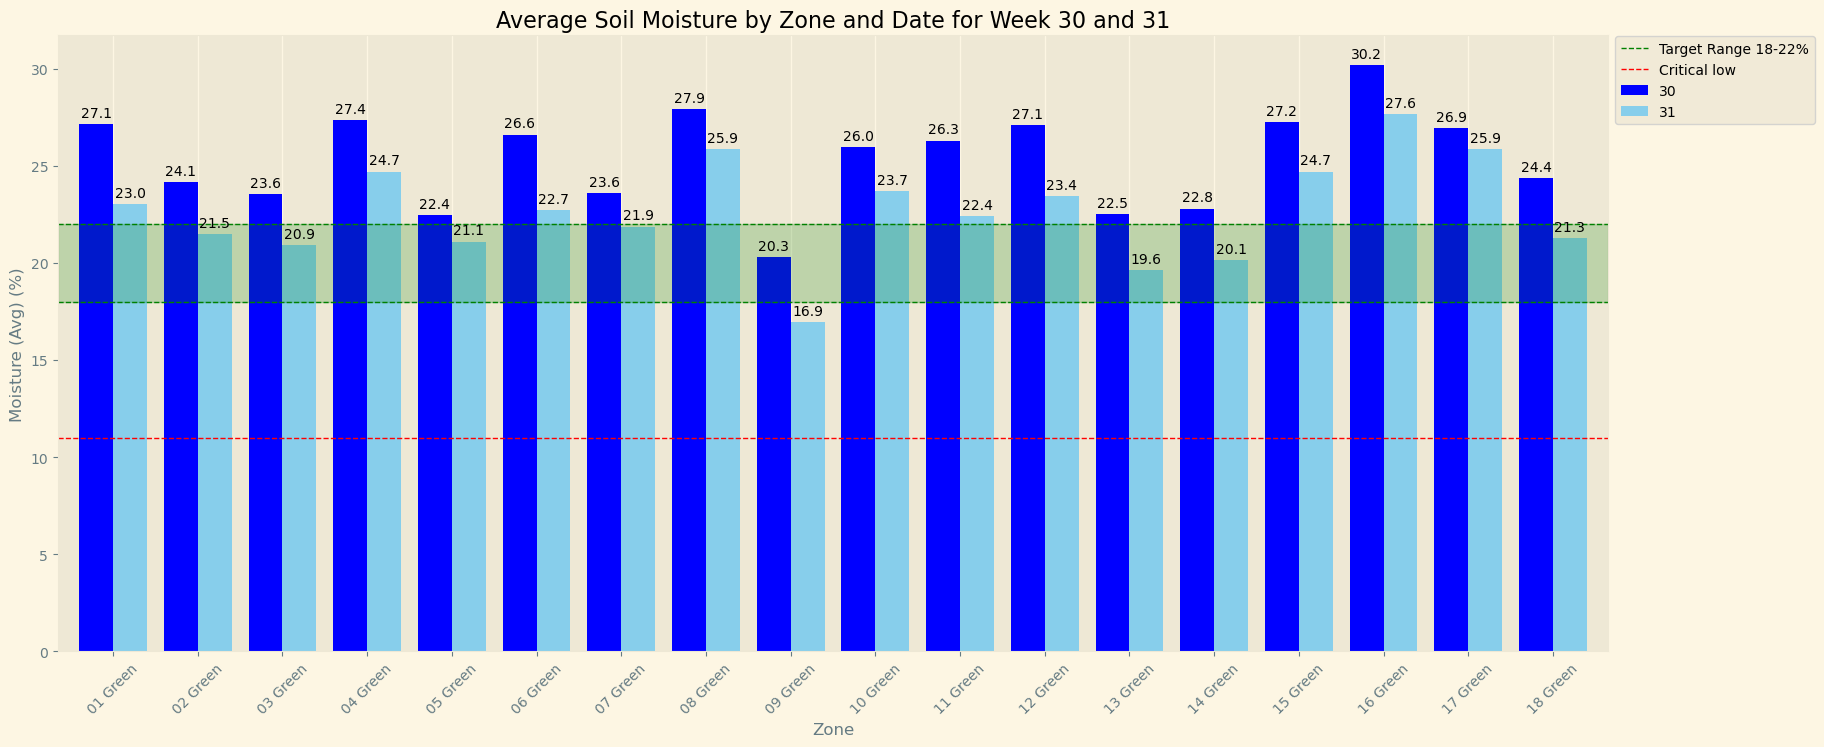

In [20]:

# Filter data for weeks 29 and 30 in 2024
weeks = [30, 31]
df_filtered = dfpogo[(dfpogo['Week'].isin(weeks)) & (dfpogo['Year'] == 2024)]

# Extract just the date part from 'Sample Date'
df_filtered['Dato'] = df_filtered['Dato'].dt.date

# Group by 'Zone' and 'Date' to calculate mean soil moisture
grouped_df = df_filtered.groupby(['Zone','Week'])['Moisture (Avg) (%)'].mean().unstack()

# Plotting
ax = grouped_df.plot(kind='bar', figsize=(20, 8), width=0.8, color=['Blue', 'skyblue'])
plt.title('Average Soil Moisture by Zone and Date for Week 30 and 31')
plt.xlabel('Zone')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points')



# Adding green dotted lines at 18% and 22%
plt.axhline(y=18, color='green', linestyle='--', linewidth=1, label='Target Range 18-22%')
plt.axhline(y=22, color='green', linestyle='--', linewidth=1 )

# Adding a red dotted line at 11%
plt.axhline(y=11, color='red', linestyle='--', linewidth=1, label='Critical low')

# Shading the area between 18% and 22% with light green
plt.fill_between(ax.get_xlim(), 18, 22, color='green', alpha=0.2)

# Adding legend with the red and green dotted lines
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1.01))

# Display the plot
plt.show()

In [ ]:
dfpogo[dfpogo['Week']== 29].count()

Zone                  72
Dataset               72
Moisture (Avg) (%)    72
Moisture (Min) (%)    72
Moisture (Max) (%)    72
Dato                  72
Time                  72
Week                  72
Year                  72
dtype: int64

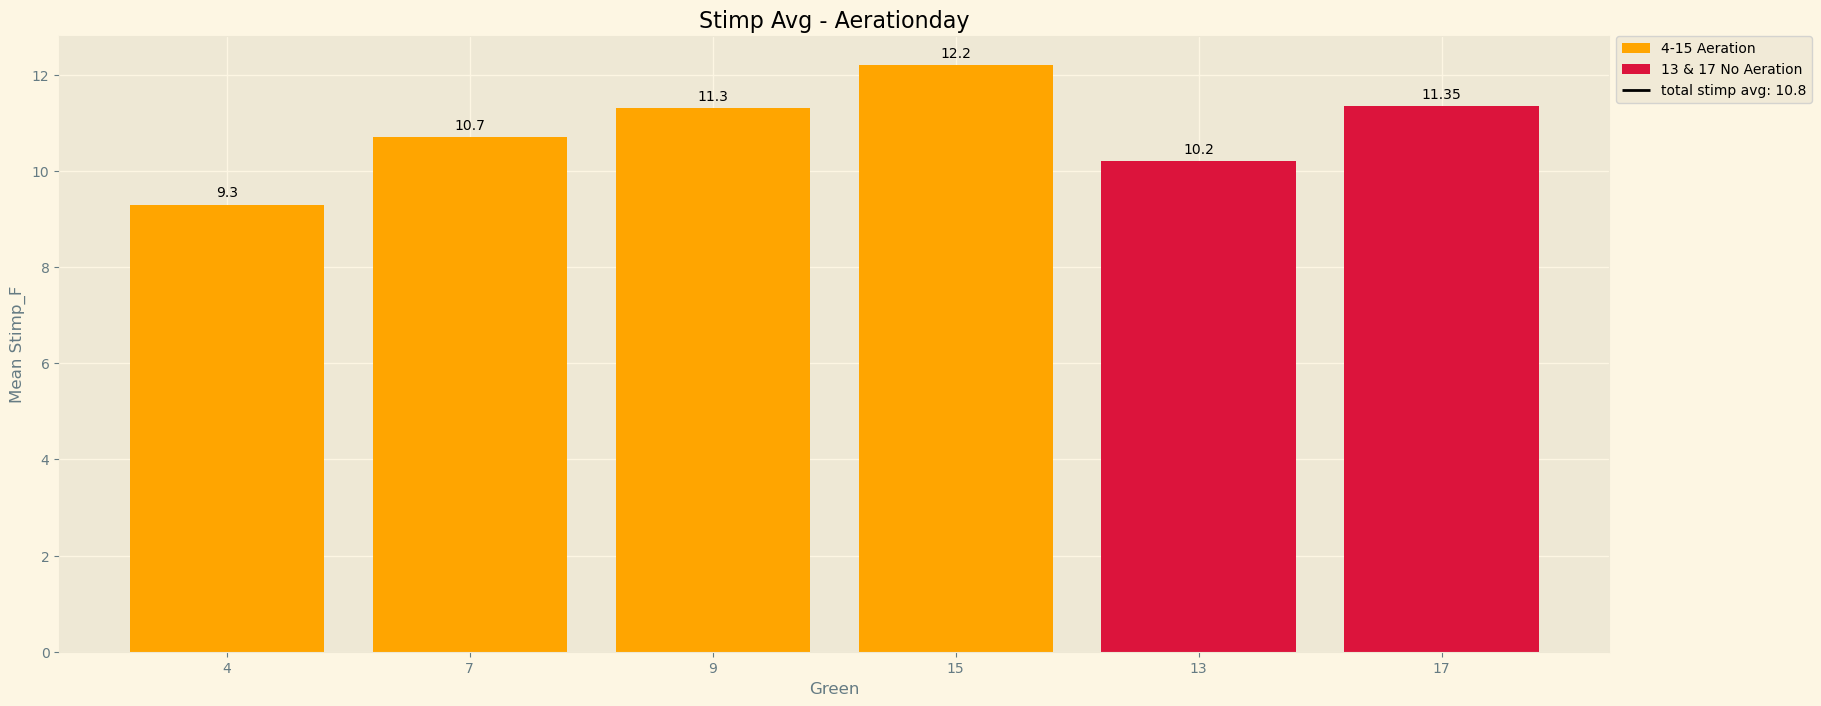

In [ ]:
# Filter data for the date 31/07/2024
df_filtered = dfstimp[dfstimp['Dato'] == '2024-07-31']

# Ensure 'Hul' column is in the correct format
df_filtered['Hul'] = df_filtered['Hul'].astype(str).str.extract('(\d+)').astype(int)

# Define the groups of greens
greens1 = [4, 7, 9, 15]
greens2 = [13, 17]

# Calculate the mean Stimp_F for each green in both groups
mean_stimp_f_greens1 = [df_filtered[df_filtered['Hul'] == green]['Stimp_F'].mean() for green in greens1]
mean_stimp_f_greens2 = [df_filtered[df_filtered['Hul'] == green]['Stimp_F'].mean() for green in greens2]

# Combine the data for plotting
all_greens = greens1 + greens2
all_mean_stimp_f = mean_stimp_f_greens1 + mean_stimp_f_greens2

# Calculate the total mean Stimp_F for all selected greens
total_mean_stimp_f = df_filtered[df_filtered['Hul'].isin(all_greens)]['Stimp_F'].mean()

# Creating the bar chart
plt.figure(figsize=(20, 8))

# Plotting bars for greens 4, 7, 9, 15
bars1 = plt.bar(range(len(greens1)), mean_stimp_f_greens1, color='orange', label='4-15 Aeration')

# Plotting bars for greens 13, 17
bars2 = plt.bar(range(len(greens1), len(greens1) + len(greens2)), mean_stimp_f_greens2, color='crimson', label='13 & 17 No Aeration')

# Adding labels and title
plt.xlabel('Green')
plt.ylabel('Mean Stimp_F')
plt.title('Stimp Avg - Aerationday')
plt.xticks(range(len(all_greens)), labels=[str(green) for green in all_greens])

# Adding the total mean to the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([], [], color='black', label=f'total stimp avg: {total_mean_stimp_f:.1f}'))
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.945))

# Adding labels with the values on each bar
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

# Displaying the plot
plt.show()